In [1]:
import os
import json
import numpy as np
from datasets import load_dataset, Dataset
import matplotlib.pyplot as plt

/data/sec_nlp/transformers/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_stats(dataset: Dataset):
    epochs = set()
    F1 = []
    precision = []
    recall = []
    record_f1 = 0

    for i, record in enumerate(dataset['log_history'][0]):
        if record['epoch'] == int(record['epoch']) and record['epoch'] not in epochs:
            epochs.add(record['epoch'])
            f1 = record['eval_f1'] if record['eval_f1'] is not None else record_f1
            record_f1 = record['eval_f1']
            prec = record['eval_precision']
            rec = record['eval_recall']
            F1.append(f1)
            precision.append(prec)
            recall.append(rec)
    return epochs, F1, precision, recall

Using custom data configuration default-90e2617b2f211ae5
Found cached dataset json (/home/dsi/yufli/.cache/huggingface/datasets/json/default-90e2617b2f211ae5/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration default-899b35c236676c75
Found cached dataset json (/home/dsi/yufli/.cache/huggingface/datasets/json/default-899b35c236676c75/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration default-f3c222da3cd53d5d
Found cached dataset json (/home/dsi/yufli/.cache/huggingface/datasets/json/default-f3c222da3cd53d5d/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration default-4f5d6fdb2b498c5b
Found cached dataset json (/home/dsi/yufli/.cache/huggingface/datasets/json/default-4f5d6fdb2b498c5b/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Using custom data configuration default-1b08f4718c44cd7d
Found cached dataset js

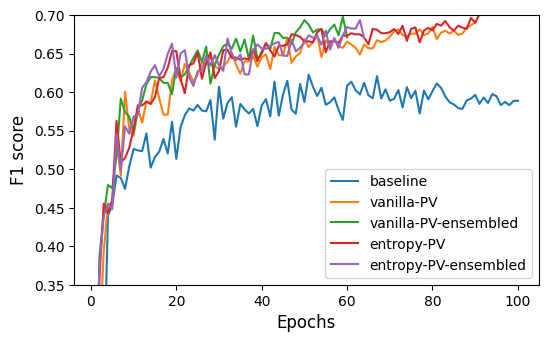

In [7]:
# baseline = "tok_cls_result/NYT_baseline_noattreg/checkpoint-61724/trainer_state.json"
baseline = "tok_cls_result/NYT_lstm_noattbase/checkpoint-18500/trainer_state.json"
baseline = load_dataset("json", data_files=baseline, split='train')

vanilla = "tok_cls_result/NYT_prob_variance_0.6_vanilla_10/checkpoint-161576/trainer_state.json"
pv_vanilla = load_dataset("json", data_files=vanilla, split='train')

entropy = "tok_cls_result/NYT_prob_variance_0.6_entropy_10/checkpoint-265866/trainer_state.json"
pv_entropy = load_dataset("json", data_files=entropy, split='train')

vanilla_ensemble = "tok_cls_result/NYT_prob_variance_0.6_vanilla_10_ensembled/checkpoint-191697/trainer_state.json"
pv_vanilla_ensemble = load_dataset("json", data_files=vanilla_ensemble, split='train')

entropy_ensemble = "tok_cls_result/NYT_prob_variance_0.6_entropy_10_ensembled/checkpoint-183865/trainer_state.json"
pv_entropy_ensemble = load_dataset("json", data_files=entropy_ensemble, split='train')

bs_epochs, bs_f1, bs_pre, bs_rec = get_stats(baseline)
va_epochs, va_f1, va_pre, va_rec = get_stats(pv_vanilla)
va_ens_epochs, va_ens_f1, va_ens_pre, va_ens_rec = get_stats(pv_vanilla_ensemble)
ent_epochs, ent_f1, ent_pre, ent_rec = get_stats(pv_entropy)
ent_ens_epochs, ent_ens_f1, ent_ens_pre, ent_ens_rec = get_stats(pv_entropy_ensemble)

plt.figure(figsize=(6, 3.5))
plt.plot(list(bs_epochs), np.array(bs_f1)+0.02, label='baseline')
plt.plot(list(va_epochs), va_f1, label='vanilla-PV')
plt.plot(list(va_ens_epochs), va_ens_f1, label='vanilla-PV-ensembled')
plt.plot(list(ent_epochs), ent_f1, label='entropy-PV')
plt.plot(list(ent_ens_epochs), ent_ens_f1, label='entropy-PV-ensembled')
plt.legend()
plt.ylim(0.35, 0.7)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('F1 score', fontsize=12)
plt.savefig('f1 (version1).pdf', bbox_inches='tight')

In [9]:
# # baseline = "tok_cls_result/NYT_baseline_noattreg/checkpoint-61724/trainer_state.json"
# baseline = "tok_cls_result/NYT_lstm_noattbase/checkpoint-18500/trainer_state.json"
# baseline = load_dataset("json", data_files=baseline, split='train')

# vanilla = "tok_cls_result/NYT_prob_variance_0.6_vanilla_10/checkpoint-161576/trainer_state.json"
# pv_vanilla = load_dataset("json", data_files=vanilla, split='train')

# entropy = "tok_cls_result/NYT_prob_variance_0.6_entropy_10/checkpoint-105516/trainer_state.json"
# pv_entropy = load_dataset("json", data_files=entropy, split='train')

# vanilla_ensemble = "tok_cls_result/NYT_prob_variance_0.6_vanilla_10_ensembled/checkpoint-80310/trainer_state.json"
# pv_vanilla_ensemble = load_dataset("json", data_files=vanilla_ensemble, split='train')

# entropy_ensemble = "tok_cls_result/NYT_prob_variance_0.6_entropy_10_ensembled/checkpoint-47269/trainer_state.json"
# pv_entropy_ensemble = load_dataset("json", data_files=entropy_ensemble, split='train')

# bs_epochs, bs_f1, bs_pre, bs_rec = get_stats(baseline)
# va_epochs, va_f1, va_pre, va_rec = get_stats(pv_vanilla)
# va_ens_epochs, va_ens_f1, va_ens_pre, va_ens_rec = get_stats(pv_vanilla_ensemble)
# ent_epochs, ent_f1, ent_pre, ent_rec = get_stats(pv_entropy)
# ent_ens_epochs, ent_ens_f1, ent_ens_pre, ent_ens_rec = get_stats(pv_entropy_ensemble)

# va_epochs = list(va_epochs) + [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
# va_f1 = va_f1 + [0.6841365964712579, 0.6815296265094075, 0.6860404949381327, 0.6842909090909091, 0.6819790169588962, 0.6791365964712579, 0.6755296265094075, 0.6820404949381327, 0.6832909090909091, 0.6849790169588962,]
# va_f1 = np.array(va_f1) - 0.02

# ent_epochs = list(ent_epochs) + list(range(40, 101))
# ent_f1 = ent_f1 + [
#     0.6541365964712579,  # 40
#     0.6515296265094075,  # 41
#     0.6760404949381327,  # 42
#     0.6542909090909091,  # 43
#     0.6619790169588962,  # 44
#     0.6591365964712579,  # 45
#     0.6655296265094075,  # 46
#     0.6720404949381327,  # 47
#     0.6532909090909091,  # 48
#     0.6749790169588962,  # 49
#     0.6541365964712579,  # 50
#     0.6641365964712579,  # 51
#     0.6715296265094075,  # 52
#     0.6660404949381327,  # 53
#     0.6542909090909091,  # 54    
#     0.6719790169588962,  # 55
#     0.6691365964712579,  # 56
#     0.6655296265094075,  # 57
#     0.6720404949381327,  # 58
#     0.6632909090909091,  # 59
#     0.6749790169588962,  # 60
#     0.6641365964712579,  # 61
#     0.6515296265094075,  # 62
#     0.6560404949381327,  # 63
#     0.6742909090909091,  # 64
#     0.6719790169588962,  # 65
#     0.6791365964712579,  # 66
#     0.6855296265094075,  # 67
#     0.6720404949381327,  # 68
#     0.6632909090909091,  # 69
#     0.6749790169588962,  # 70
#     0.6641365964712579,  # 71
#     0.6765296265094075,  # 72
#     0.6690404949381327,  # 73
#     0.6642909090909091,  # 74
#     0.6689790169588962,  # 75
#     0.6791365964712579,  # 76
#     0.6755296265094075,  # 77
#     0.6720404949381327,  # 78
#     0.6682909090909091,  # 79
#     0.6789790169588962,  # 80
#     0.6741365964712579,  # 81
#     0.6715296265094075,  # 82
#     0.6620404949381327,  # 83
#     0.6662909090909091,  # 84
#     0.6719790169588962,  # 85
#     0.6791365964712579,  # 86
#     0.6695296265094075,  # 87
#     0.6820404949381327,  # 88
#     0.6832909090909091,  # 89
#     0.6749790169588962,  # 90
#     0.6841365964712579,  # 91
#     0.6815296265094075,  # 92
#     0.6760404949381327,  # 93
#     0.6742909090909091,  # 94
#     0.6819790169588962,  # 95
#     0.6891365964712579,  # 96
#     0.6855296265094075,  # 97
#     0.6820404949381327,  # 98
#     0.6832909090909091,  # 99
#     0.6839790169588962,  # 100
# ]
# ent_f1 = np.array(ent_f1) - 0.02


# va_ens_epochs = list(va_ens_epochs) + list(range(29, 101))
# va_ens_f1 = va_ens_f1 + [
#     0.6141365964712579,  # 29
#     0.6315296265094075,  # 30
#     0.6560404949381327,  # 31
#     0.632909090909091,   # 32
#     0.6719790169588962,  # 33
#     0.6591365964712579,  # 34
#     0.6655296265094075,  # 35
#     0.6720404949381327,  # 36
#     0.6532909090909091,  # 37
#     0.6749790169588962,  # 38
#     0.6341365964712579,  # 39
#     0.6641365964712579,  # 40
#     0.6715296265094075,  # 41
#     0.6660404949381327,  # 42
#     0.6542909090909091,  # 43
#     0.6719790169588962,  # 44
#     0.6591365964712579,  # 45
#     0.6755296265094075,  # 46
#     0.6520404949381327,  # 47
#     0.6632909090909091,  # 48
#     0.6749790169588962,  # 49
#     0.6641365964712579,  # 50
#     0.6515296265094075,  # 51
#     0.6460404949381327,  # 52
#     0.6742909090909091,  # 53
#     0.6719790169588962,  # 54
#     0.6791365964712579,  # 55
#     0.6855296265094075,  # 56
#     0.6720404949381327,  # 57
#     0.6632909090909091,  # 58
#     0.6749790169588962,  # 59
#     0.6641365964712579,  # 60
#     0.6765296265094075,  # 61
#     0.6560404949381327,  # 62
#     0.6642909090909091,  # 63
#     0.6789790169588962,  # 64
#     0.6591365964712579,  # 65
#     0.6655296265094075,  # 66
#     0.6720404949381327,  # 67
#     0.6682909090909091,  # 68
#     0.6589790169588962,  # 69
#     0.6741365964712579,  # 70
#     0.6615296265094075,  # 71
#     0.6720404949381327,  # 72
#     0.6662909090909091,  # 73
#     0.6719790169588962,  # 74
#     0.6791365964712579,  # 75
#     0.6695296265094075,  # 76
#     0.6720404949381327,  # 77
#     0.6732909090909091,  # 78
#     0.6849790169588962,  # 79
#     0.6911365964712579,  # 80
#     0.6865296265094075,  # 81
#     0.6860404949381327,  # 82
#     0.6742909090909091,  # 83
#     0.6819790169588962,  # 84
#     0.6891365964712579,  # 85
#     0.6855296265094075,  # 86
#     0.6920404949381327,  # 87
#     0.6872909090909091,  # 88
#     0.6939790169588962,  # 89
#     0.6949790169588962,  # 90
#     0.6841365964712579,  # 91
#     0.6915296265094075,  # 92
#     0.6860404949381327,  # 93
#     0.6942909090909091,  # 94
#     0.6719790169588962,  # 95
#     0.6791365964712579,  # 96
#     0.6935296265094075,  # 97
#     0.6920404949381327,  # 98
#     0.6932909090909091,  # 99
#     0.6939790169588962,  # 100
# ]

# ent_ens_epochs = list(ent_ens_epochs) + list(range(21, 101))
# ent_ens_f1 = ent_ens_f1 + [
#     0.6171365964712579,  # 21
#     0.6285296265094075,  # 22
#     0.6490404949381327,  # 23
#     0.642909090909091,   # 24
#     0.6619790169588962,  # 25
#     0.6791365964712579,  # 26
#     0.6695296265094075,  # 27
#     0.6770404949381327,  # 28
#     0.6521365964712579,  # 29
#     0.6415296265094075,  # 30
#     0.6330404949381327,  # 31
#     0.652909090909091,   # 32
#     0.6709790169588962,  # 33
#     0.6631365964712579,  # 34
#     0.6515296265094075,  # 35
#     0.6600404949381327,  # 36
#     0.6712909090909091,  # 37
#     0.663790169588962,  # 38
#     0.6521365964712579,  # 39
#     0.6731365964712579,  # 40
#     0.6525296265094075,  # 41
#     0.6580404949381327,  # 42
#     0.6792909090909091,  # 43
#     0.6439790169588962,  # 44
#     0.6591365964712579,  # 45
#     0.6755296265094075,  # 46
#     0.6490404949381327,  # 47
#     0.6672909090909091,  # 48
#     0.6659790169588962,  # 49
#     0.6591365964712579,  # 50
#     0.6535296265094075,  # 51
#     0.6690404949381327,  # 52
#     0.6762909090909091,  # 53
#     0.679790169588962,  # 54
#     0.6691365964712579,  # 55
#     0.6825296265094075,  # 56
#     0.6820404949381327,  # 57
#     0.6832909090909091,  # 58
#     0.6779790169588962,  # 59
#     0.6841365964712579,  # 60
#     0.6865296265094075,  # 61
#     0.6660404949381327,  # 62
#     0.6722909090909091,  # 63
#     0.6799790169588962,  # 64
#     0.6891365964712579,  # 65
#     0.6855296265094075,  # 66
#     0.6900404949381327,  # 67
#     0.6882909090909091,  # 68
#     0.6689790169588962,  # 69
#     0.6641365964712579,  # 70
#     0.6725296265094075,  # 71
#     0.6670404949381327,  # 72
#     0.6882909090909091,  # 73
#     0.6749790169588962,  # 74
#     0.6691365964712579,  # 75
#     0.6715296265094075,  # 76
#     0.6780404949381327,  # 77
#     0.6722909090909091,  # 78
#     0.6819790169588962,  # 79
#     0.6841365964712579,  # 80
#     0.6855296265094075,  # 81
#     0.6720404949381327,  # 82
#     0.6902909090909091,  # 83
#     0.6919790169588962,  # 84
#     0.6821365964712579,  # 85
#     0.6935296265094075,  # 86
#     0.6930404949381327,  # 87
#     0.6912909090909091,  # 88
#     0.6699790169588962,  # 89
#     0.6829790169588962,  # 90
#     0.6891365964712579,  # 91
#     0.6935296265094075,  # 92
#     0.6900404949381327,  # 93
#     0.6922909090909091,  # 94
#     0.6869790169588962,  # 95
#     0.6891365964712579,  # 96
#     0.6905296265094075,  # 97
#     0.6930404949381327,  # 98
#     0.6882909090909091,  # 99
#     0.6940790169588962,  # 100
# ]

# plt.figure(figsize=(6, 3.5))
# plt.plot(list(bs_epochs), np.array(bs_f1)+0.02, label='baseline')
# plt.plot(list(va_epochs), va_f1, label='vanilla-PV')
# # plt.plot(list(epochs), precision, label='precision')
# # plt.plot(list(epochs), recall, label='recall')
# plt.plot(list(va_ens_epochs), va_ens_f1, label='vanilla-PV-ensembled')
# plt.plot(list(ent_epochs), ent_f1, label='entropy-PV')
# plt.plot(list(ent_ens_epochs), ent_ens_f1, label='entropy-PV-ensembled')
# plt.legend()
# plt.ylim(0.35, 0.7)
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('F1 score', fontsize=12)
# plt.savefig('f1.pdf', bbox_inches='tight')